# resistivité du fil métallique


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display


Code de régression linéaire général: 

In [43]:
def lin_Reg(y,x):
    
    x = np.array(x) ; x_reshaped = x.reshape(-1,1) ; y = np.array(y)

    model = LinearRegression() ; model.fit(x_reshaped, y)

    y_pred = model.predict(x_reshaped)
    mse = mean_squared_error(y, y_pred)

    return y_pred, model.coef_[0], mse, model

## 1. Données expérimentales

In [44]:
#dimensions de l'échantillon
S = np.pi*((0.00017/2.0)**2) #[m^2]
L_HT = 0.05                #[m]
L_BT = 0.08                #[m]

#mesures jusqu'à 600 °C
U1 = [0.524, 2.247,4.150 ,4.848  ]
U2= [0.607, 2.191,4.175,4.930 ]

HTsamp = len(U1)
U_HT = np.zeros(4)
for i in range(HTsamp):
    U_HT[i] = (U1[i]+U2[i])/2

I_HT = [0.1,  0.5   ,1     ,1.2]
T= [30,  100   ,195  ,320 ]

#mesures à 'basse' température
I_BT = [0.08,0.15,0.21 ,0.25,0.29,0.34,0.40,0.45,0.49, 0.55,0.60,0.65,0.70,0.75 ]
U_BT = [0.453,0.764,1.1,1.3,1.47,1.76,2.02, 2.32, 2.52,2.78,3.02,3.26,3.58,3.78 ]

BTsamp = len(I_BT)


## 2. $V = RI$ Régression linéaire

In [45]:
UBT_pred, RBT,MSEBT,___ = lin_Reg(U_BT, I_BT)
UHT_pred, RHT,MSEHT,___ = lin_Reg(U_HT, I_HT)
rho_BT = RBT * S / L_BT
rho_HT = RHT * S / L_HT

RES = np.array([[rho_BT*1e06,RBT,MSEBT],[rho_HT*1e06,RHT,MSEHT]])
columns = ["Resistivity (ρ) [μΩ·m]", "Resistance (R) [Ω]", "MSE [V²]"]
index = ["Low Temperature (BT)", "High Temperature (HT)"]
RES_df = pd.DataFrame(RES, columns=columns, index=index)
display(RES_df)


,Resistivity (ρ) [μΩ·m],Resistance (R) [Ω],MSE [V²]
Low Temperature (BT),1.418265,4.998731,0.000509
High Temperature (HT),1.785260,3.932635,0.001299


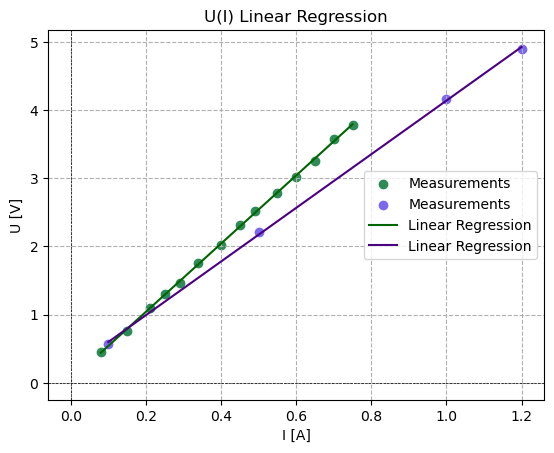

In [46]:
plt.scatter(I_BT, U_BT, color='seagreen', label='Measurements')
plt.scatter(I_HT, U_HT, color='mediumslateblue', label='Measurements')

plt.plot(I_BT, UBT_pred, color='darkgreen', label='Linear Regression')
plt.plot(I_HT, UHT_pred, color='indigo', label='Linear Regression')

plt.xlabel('I [A]')
plt.ylabel('U [V]')
plt.title('U(I) Linear Regression')
plt.legend()
plt.axhline(0, color='black',linestyle='dashed' , lw=0.5)
plt.axvline(0, color='black',linestyle='dashed', lw=0.5)
plt.grid(True, linestyle='dashed')
plt.show()

## 3. Trouver une relation U(T)

Comme on a pas de mesure de la température pour l'expérience en autonomie, Il faudrait interpoler un coubre sur base des 4 mesures faites en 'labo'. Comme on reste en dessous de 4 voltes, on peut approximer la relation par une droite et faire une régression linéaire

In [47]:
rho_BT_list = np.zeros(BTsamp)
rho_HT_list = np.zeros(HTsamp)

for i in range(BTsamp):
    rho_BT_list[i] = (U_BT[i]/I_BT[i]) * S / L_BT
for i in range(HTsamp):
    rho_HT_list[i] = (U_HT[i]/I_HT[i]) * S / L_HT
print(rho_HT_list)

[2.56714458e-06 2.01467509e-06 1.88960908e-06 1.84950926e-06]


C:\Users\roeke\AppData\Local\Temp\ipykernel_12428\4010170795.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\roeke\AppData\Local\Temp\ipykernel_12428\4010170795.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


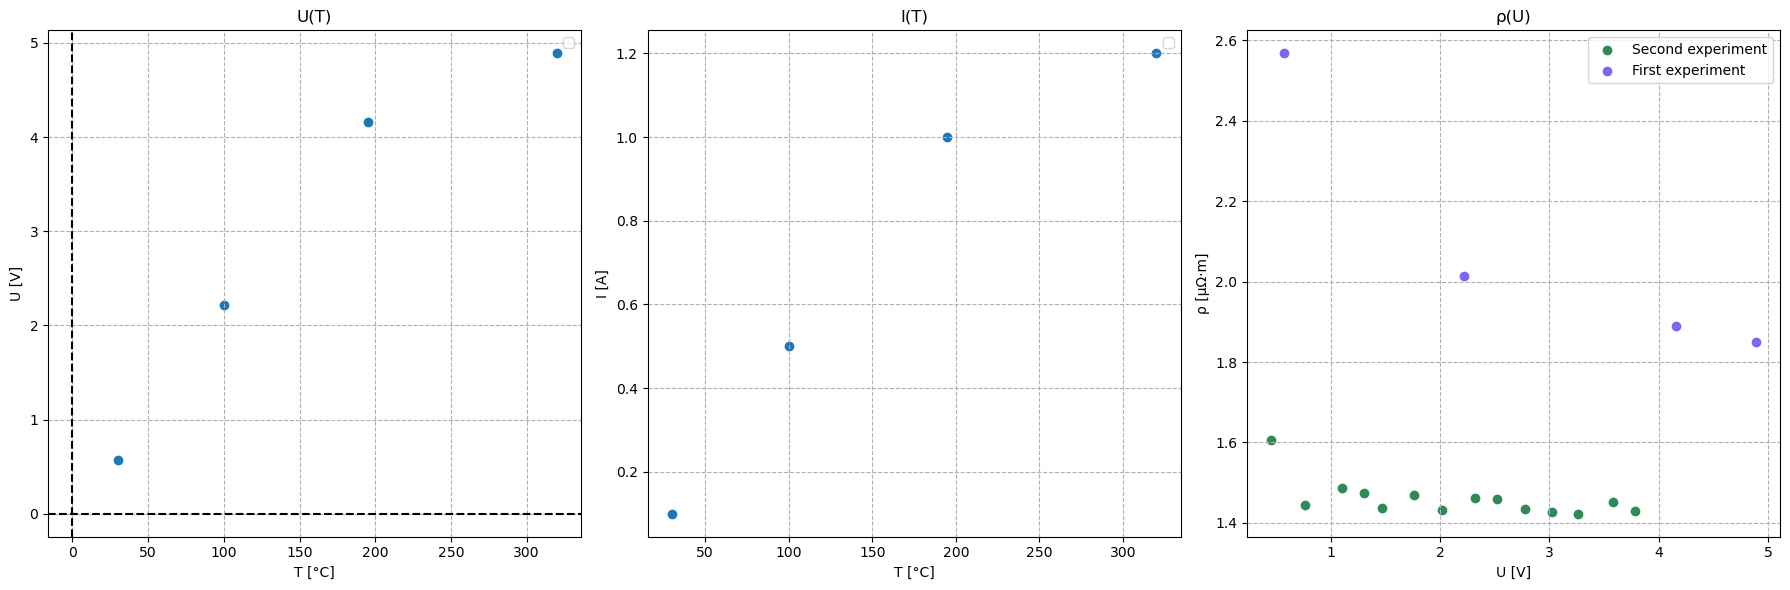

In [48]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First graph: U(T)
axes[0].scatter(T, U_HT)
axes[0].set_xlabel('T [°C]')
axes[0].set_ylabel('U [V]')
axes[0].set_title('U(T)')
axes[0].axhline(0, linestyle='dashed', color='black')
axes[0].axvline(0, linestyle='dashed', color='black')
axes[0].legend()
axes[0].grid(True, linestyle='dashed')

# Second graph: I(T)
axes[1].scatter(T, I_HT)
axes[1].set_xlabel('T [°C]')
axes[1].set_ylabel('I [A]')
axes[1].set_title('I(T)')
axes[1].legend()
axes[1].grid(True, linestyle='dashed')

# Third graph: ρ(U)
axes[2].scatter(U_BT, rho_BT_list * 1e06, color='seagreen', label='Second experiment')
axes[2].scatter(U_HT, rho_HT_list * 1e06, color='mediumslateblue', label='First experiment')
axes[2].set_xlabel('U [V]')
axes[2].set_ylabel('ρ [μΩ·m]')
axes[2].set_title('ρ(U)')
axes[2].legend()
axes[2].grid(True, linestyle='dashed')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## 4. $\rho (T)$ régression linéaire

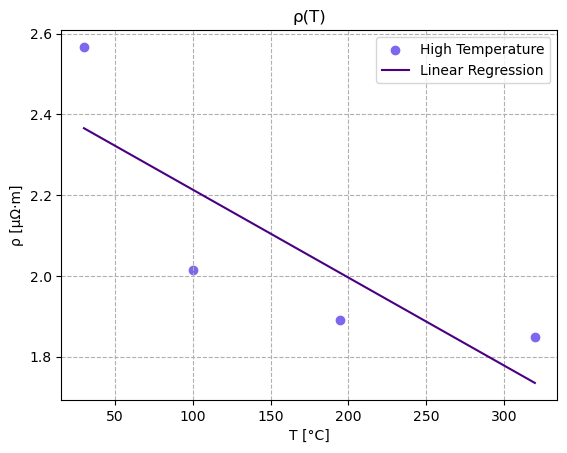

In [49]:

rho_HT_pred, drhodT_HT, MSEHT,model = lin_Reg(rho_HT_list, T)

plt.scatter(T, rho_HT_list*1e06, color='mediumslateblue', label='High Temperature')
plt.plot(T, rho_HT_pred*1e06, color='indigo', label='Linear Regression')

plt.xlabel('T [°C]')
plt.ylabel('ρ [μΩ·m]')
plt.title('ρ(T)')
plt.legend()
plt.grid(True, linestyle='dashed')
plt.show()



## Comparaison avec d'autres matériaux

In [50]:
# Load the data from the CSV file
file_path = "Ag_rho.csv"  # Update this path if the file is in a different location
data = pd.read_csv(file_path)

# Inspect the data structure (uncomment if needed)
# print(data.head())

# Extract temperature and resistivity data for different purities
T = data['Temperature']  # Assuming the column for temperature is named 'Temperature'
purities = [col for col in data.columns if col != 'Temperature']  # All other columns are purities

# Plot resistivity as a function of temperature for each purity
plt.figure(figsize=(10, 6))
for purity in purities:
    plt.plot(T, data[purity], label=f'Purity: {purity}')

# Add labels, title, and legend
plt.xlabel('Temperature [°C]')
plt.ylabel('Resistivity [Ω·m]')
plt.title('Resistivity as a Function of Temperature for Ag with Different Purities')
plt.legend()
plt.grid(True, linestyle='dashed')

# Show the plot
plt.tight_layout()
plt.show()

KeyError: 'Temperature'